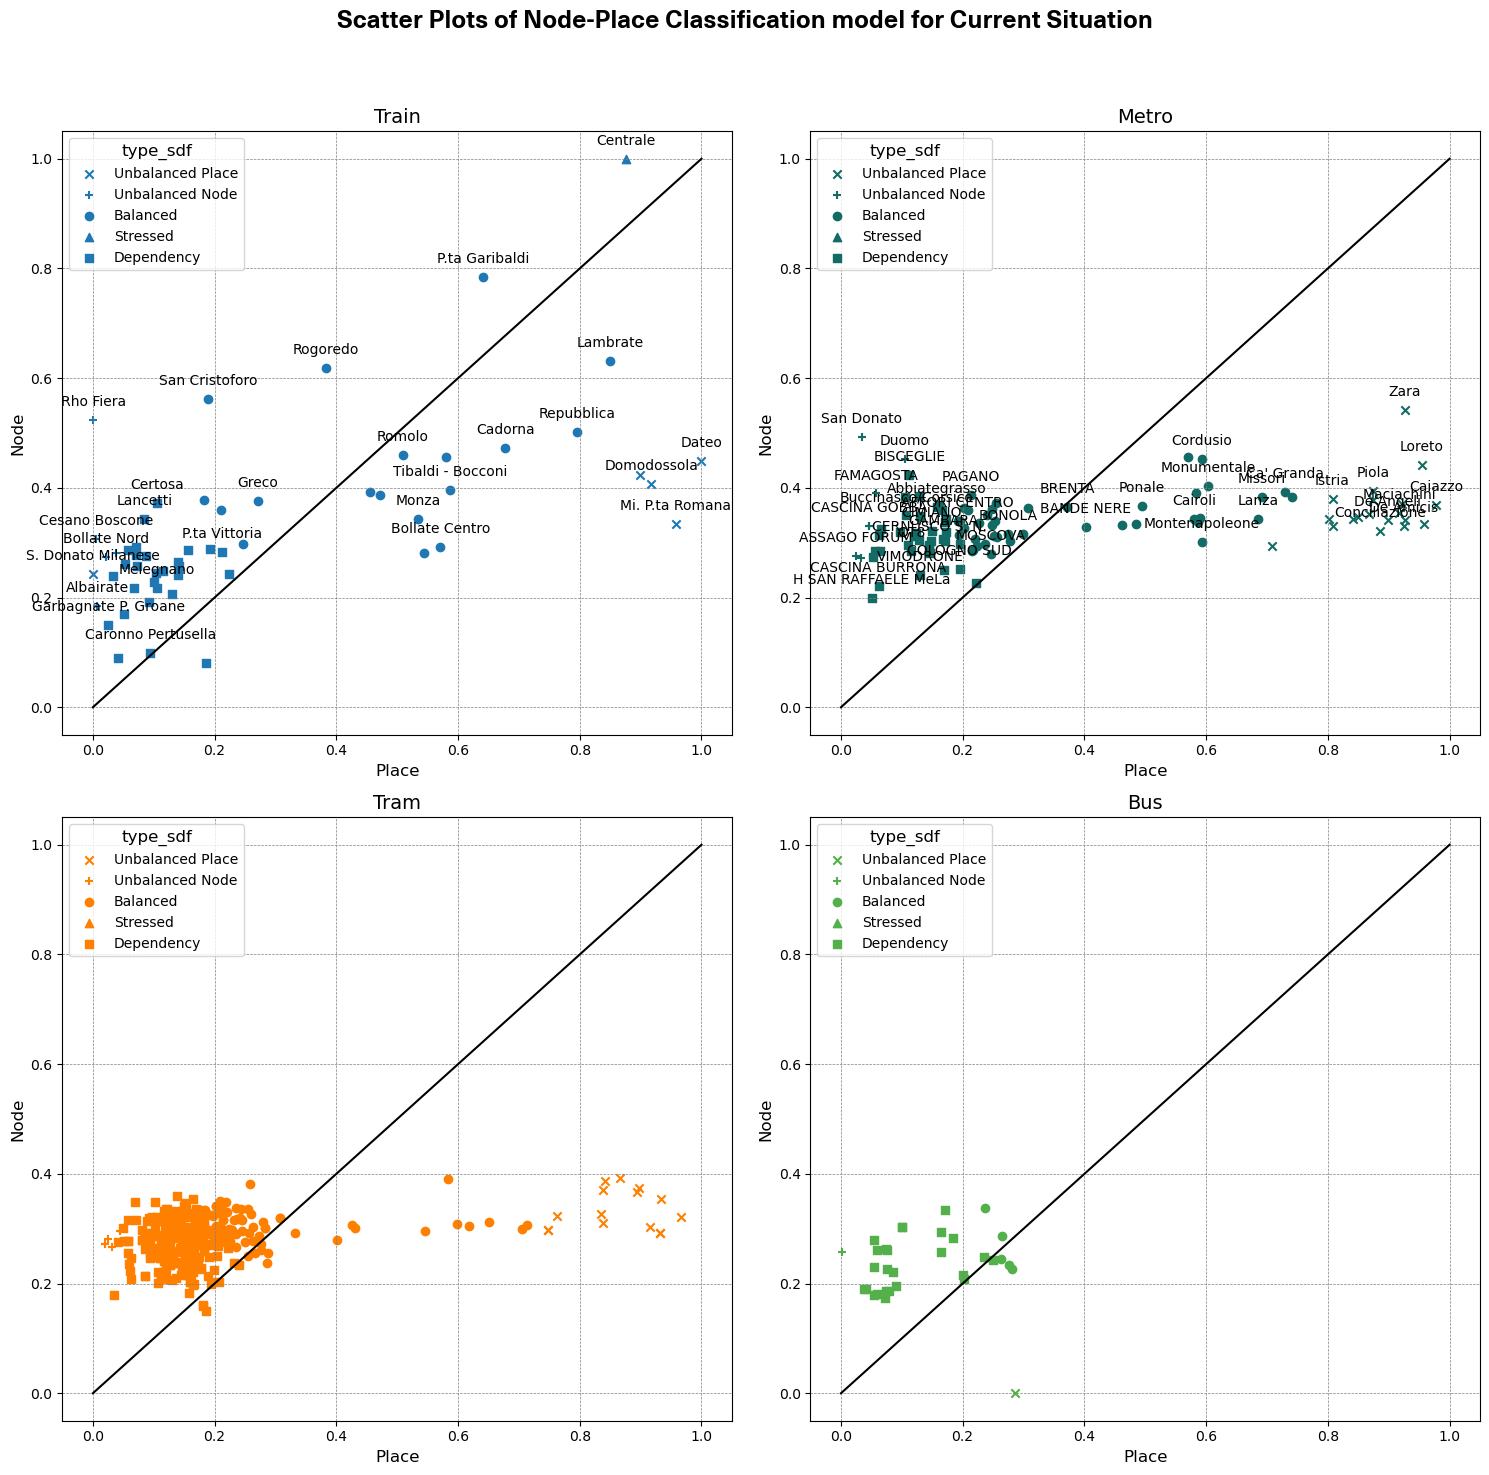

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Load the Excel file
file_path = r"D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\Mapping\NP-model-09-05-2024\NP-Graph\SDF\SDFF.xlsx"
zscore_data = pd.read_excel(file_path, sheet_name='SDF- ZScore')

# Define hub types and colors
hub_types_colors = {
    "Train": "#1f78b4",
    "Metro": "#126b64",
    "Tram": "#ff7f00",
    "Bus": "#54b04a"
}

# Define symbols for NP/Type values
symbols = {
    "Unbalanced Place": "x",
    "Unbalanced Node": "+",
    "Balanced": "o",
    "Stressed": "^",
    "Dependency": "s"
}

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle("Scatter Plots of Node-Place Classification model for Current Situation", fontsize=18, fontweight='bold', fontname='Neue Haas Unica')

# Define a mapping of hub types to subplot coordinates
hub_to_axes = {
    "Train": axs[0, 0],
    "Metro": axs[0, 1],
    "Tram": axs[1, 0],
    "Bus": axs[1, 1]
}

# Iterate through the hub types to plot them on their respective subplot
for hub_type, color in hub_types_colors.items():
    data = zscore_data[zscore_data["Hub_type"] == hub_type]
    ax = hub_to_axes[hub_type]
    
    for np_type, symbol in symbols.items():
        subset_data = data[data["type_sdf"] == np_type]
        ax.scatter(subset_data["norm place_SDF"], subset_data["norm node_SDF"], label=f"{np_type}", color=color, marker=symbol)
    
    if hub_type not in ["Bus", "Tram"]:
        texts = []
        for _, row in data.iterrows():
            # Place text at a fixed distance above the point
            text = ax.text(row["norm place_SDF"], row["norm node_SDF"] + 0.02, row["Hub_name"], fontsize=10, ha='center', va='bottom')  # Increased font size here
            texts.append(text)
        
        # Check for overlapping labels and hide them
        for i, text1 in enumerate(texts):
            bbox1 = text1.get_window_extent()
            for j, text2 in enumerate(texts):
                if i != j:
                    bbox2 = text2.get_window_extent()
                    if bbox1.overlaps(bbox2):
                        text2.set_visible(False)
    
    total_count = len(data)
    ax.plot([0, 1], [0, 1], color='black')  # x=y line
    ax.set_title(f"{hub_type.capitalize()}", fontsize=14)
    ax.set_xlabel("Place", fontsize=12)
    ax.set_ylabel("Node", fontsize=12)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
    ax.legend(title="type_sdf", loc="upper left", fontsize=10, title_fontsize=12)

# Adjust layout to avoid overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save the plot as a PDF
pdf_path = r"D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\Mapping\NP-model-09-05-2024\NP-Graph\SDF\SDF.pdf"
plt.savefig(pdf_path)

plt.show()
